# Heart Disease Prediction Analysis

## Project Overview

This notebook presents a comprehensive machine learning analysis for predicting heart disease using clinical and diagnostic features. We explore various classification algorithms to identify the most effective model for early heart disease detection.

### Objectives:
- Perform exploratory data analysis on heart disease dataset
- Engineer relevant features for improved prediction accuracy
- Compare multiple machine learning algorithms
- Identify the best performing model for heart disease prediction

### Key Findings:
- RandomForest classifier achieved the highest performance with F1 Score of 0.886
- Feature engineering and proper encoding significantly improved model performance
- Age, cholesterol levels, and chest pain type are strong predictors

---

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

import random
import numpy as np

import torch

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


import warnings
warnings.filterwarnings('ignore')

##  Data Loading

Loading the heart disease dataset from the local file system. This dataset contains clinical measurements and diagnostic information from patients, which will be used to train machine learning models for heart disease prediction.

**Dataset Source**: Heart disease clinical data with patient demographics, symptoms, and test results.

In [3]:
df = pd.read_csv(r"C:\Users\dabadir\Desktop\.py\datasets\heart.csv") #read the dataset

###  Problem Statement

**Objective**: Develop a machine learning model to predict the presence of heart disease in patients based on clinical diagnostic measurements and patient characteristics.

**Business Impact**: Early and accurate heart disease detection can lead to:
- Improved patient outcomes through timely intervention
- Reduced healthcare costs by preventing emergency situations  
- Better resource allocation in healthcare facilities
- Enhanced preventive care strategies

##  Exploratory Data Analysis

Let's examine the structure, and patterns in our heart disease dataset to better understand the data before building our predictive models.

## Features Description

This dataset contains the following features for heart disease prediction:

| Feature | Description | Type/Values |
|---------|-------------|-------------|
| **Age** | Patient's age in years | Continuous (years) |
| **Sex** | Biological sex of the patient | Categorical: 'M' (Male), 'F' (Female) |
| **ChestPainType** | Type of chest pain experienced | Categorical: <br>• TA: Typical Angina<br>• NAP: Non-Anginal Pain<br>• ASY: Asymptomatic |
| **RestingBP** | Resting blood pressure | Continuous (mm Hg) |
| **Cholesterol** | Serum cholesterol level | Continuous (mg/dl) |
| **FastingBS** | Fasting blood sugar level | Binary: <br>• 1: >120 mg/dl<br>• 0: ≤120 mg/dl |
| **RestingECG** | Resting electrocardiogram results | Categorical: <br>• Normal<br>• ST: ST-T wave abnormality<br>• LVH: Left ventricular hypertrophy |
| **MaxHR** | Maximum heart rate achieved during exercise | Continuous (bpm) |
| **ExerciseAngina** | Angina induced by exercise | Binary: Yes/No |
| **ST_Slope** | Slope of ST segment during peak exercise | Categorical: <br>• Up: Upward slope<br>• Flat: Flat slope<br>• Down: Downward slope |
| **HeartDisease** | **Target Variable** | Binary: <br>• 1: Heart disease present<br>• 0: No heart disease |

### Key Notes:
- **Target Variable**: `HeartDisease` is what we're trying to predict
- **High-Risk Indicators**: Higher cholesterol levels and certain chest pain types may indicate increased heart disease risk
- **Exercise-Related**: `MaxHR`, `ExerciseAngina`, and `ST_Slope` provide insights into heart performance under stress

In [4]:
df.head() # Display the first few rows of the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


###  Basic Dataset Information



In [5]:
df.shape # Check the shape of the dataset

(918, 12)

In [6]:
df.info() # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()# Display statistical summary of the dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.isnull().sum()# Check for missing values in the dataset

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#  Data Preprocessing & Feature Engineering

This section covers data cleaning, feature engineering, and preparation for machine learning models.

##  Correlation Analysis & Visualization

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Text(0.5, 1.0, 'Top Correlated Features with HeartDisease')

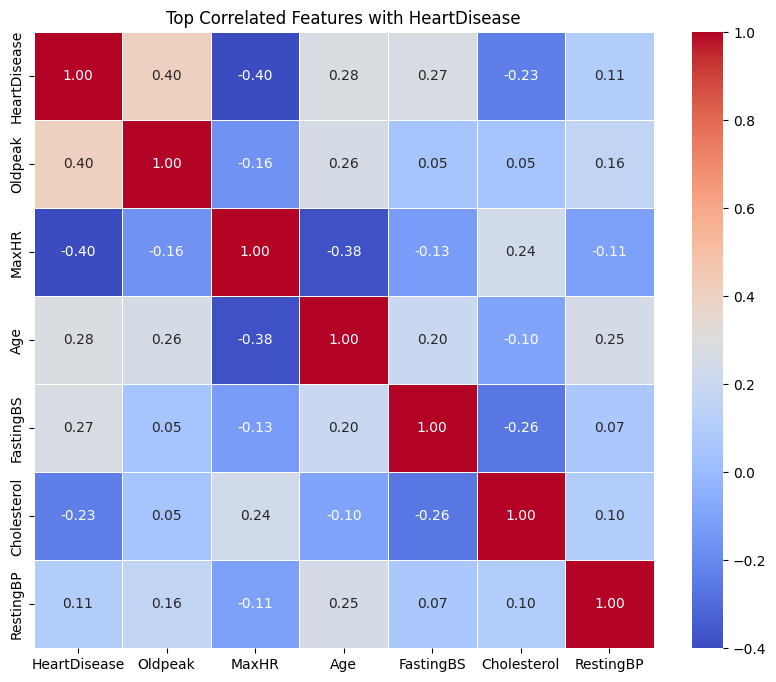

In [10]:
cor = df.corr(numeric_only=True) # Calculate the correlation matrix     
top_features = cor['HeartDisease'].abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, fmt='.2f', linewidths=.5, cmap='coolwarm')
plt.title('Top Correlated Features with HeartDisease')


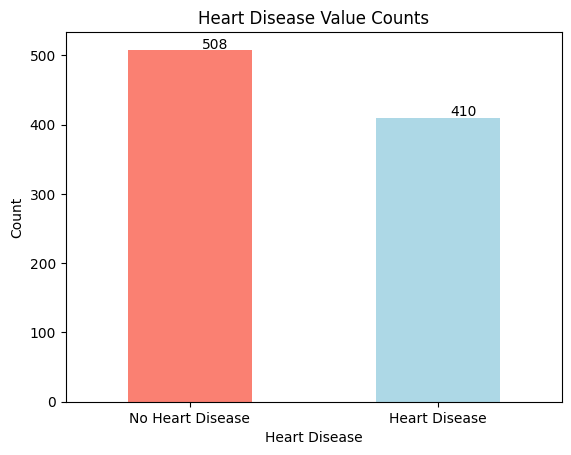

In [11]:
ax = df.HeartDisease.value_counts().plot(kind="bar", color=["salmon", "lightblue"]) # Plotting the value counts of HeartDisease
ax.set_xticklabels(["No Heart Disease", "Heart Disease"], rotation=0)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 2))
plt.title("Heart Disease Value Counts")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

## Data Distribution & Visualization

Understanding the distribution of our target variable and key features:

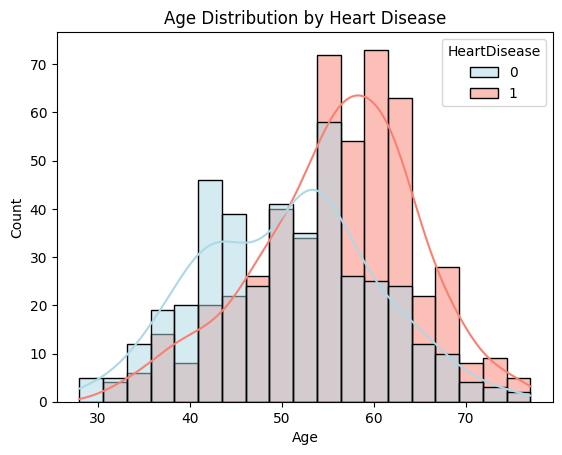

In [12]:
sns.histplot(data=df, x="Age", hue="HeartDisease", kde=True, palette=["lightblue", "salmon"]) # Plotting the distribution of Age by Heart Disease status
plt.xlabel("Age")
plt.title("Age Distribution by Heart Disease")
plt.show()

<Figure size 1200x1000 with 0 Axes>

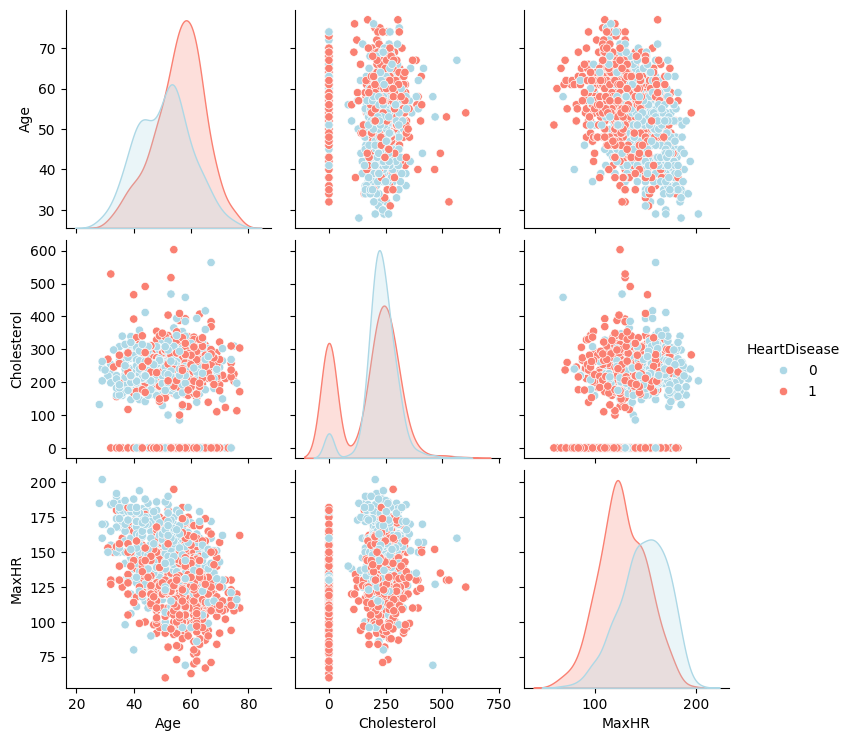

In [13]:
top_features = ['Age', 'Cholesterol', 'MaxHR', 'HeartDisease'] # Selecting top features for pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df[top_features], hue="HeartDisease", palette=["lightblue", "salmon"])
plt.show()

### Target Variable Encoding

**HeartDisease** (Target Variable):
- **1**: Heart disease present (Positive case)
- **0**: No heart disease (Normal/Negative case)

This binary classification problem aims to distinguish between patients with and without heart disease.

<Axes: xlabel='HeartDisease'>

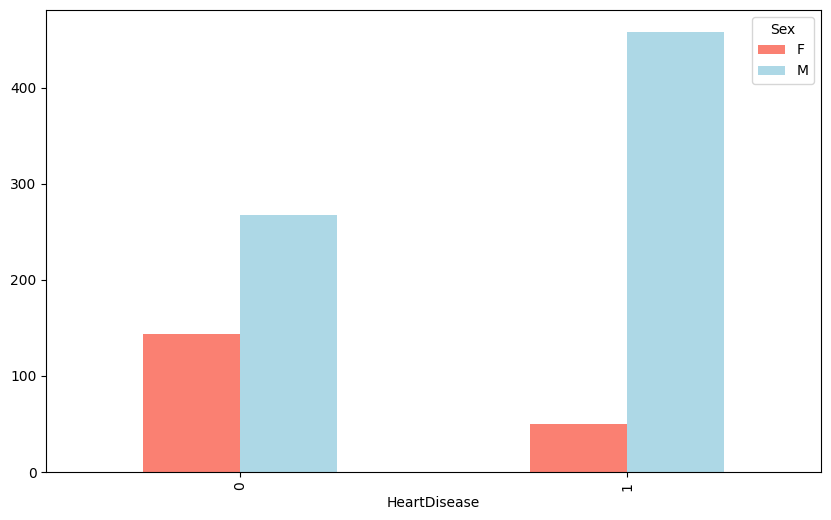

In [14]:
pd.crosstab(df['HeartDisease'], df['Sex']).plot(    # Crosstab of HeartDisease  
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "lightblue"]
)

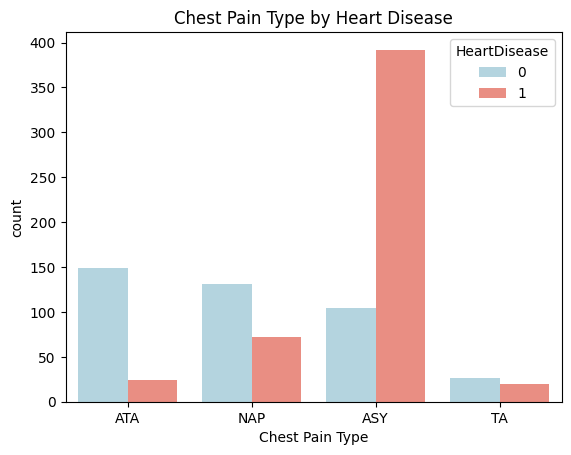

In [15]:
sns.countplot(data=df, x="ChestPainType", hue="HeartDisease", palette=["lightblue", "salmon"]) # Plotting the count of Chest Pain Types by Heart Disease status
plt.xlabel("Chest Pain Type")
plt.title("Chest Pain Type by Heart Disease")
plt.show()

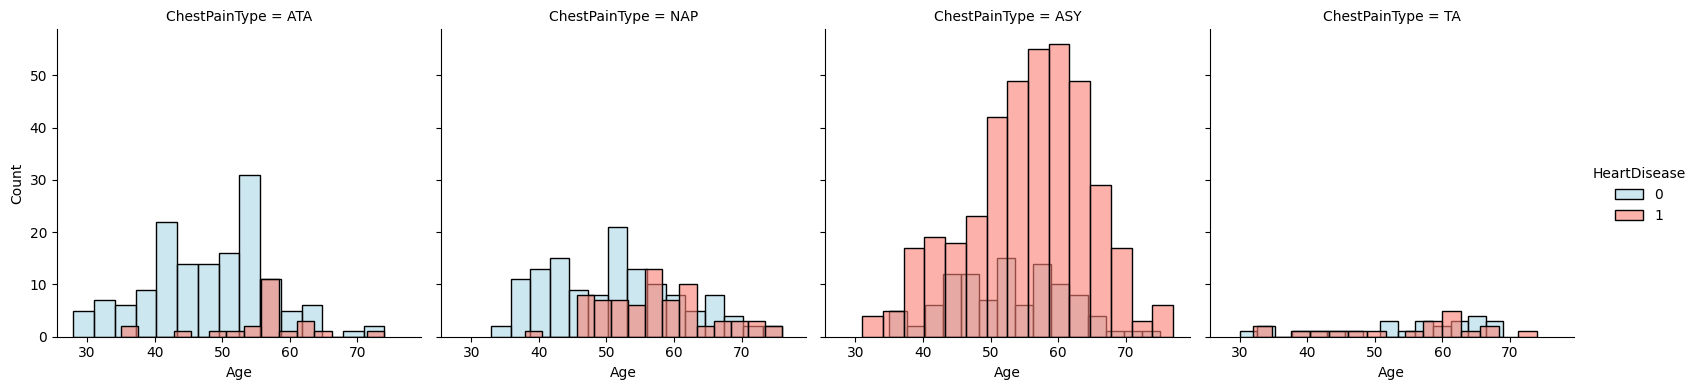

In [16]:
g = sns.FacetGrid(df, col="ChestPainType", hue="HeartDisease", palette=["lightblue", "salmon"], height=4) # Create a FacetGrid for Chest Pain Types
g.map(sns.histplot, "Age", alpha=0.6, bins=15)
g.add_legend()
plt.show()

## Feature Engineering & Data Preparation

Cleaning data, creating new features, and encoding categorical variables for machine learning:

In [17]:
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True) # Fill missing values in Cholesterol with the mean
df.drop('Oldpeak', axis=1, inplace=True) # Drop the 'Oldpeak' column as it is not needed for analysis
 
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 40, 55, 70, 100], labels=['<40', '40-55', '55-70', '70+'])
df['Age_Cholesterol'] = df['Age'] * df['Cholesterol']
 

In [18]:

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'AgeGroup'] # List of categorical columns to be one-hot encoded
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

X = df_encoded.drop('HeartDisease', axis=1)

#  Model Training and Evaluation

Training multiple classification algorithms and comparing their performance using key metrics.

##  Experiment 1: All Features Model

Training classifiers using all available features (after one-hot encoding) to establish baseline performance:

In [19]:

# Use the one-hot encoded DataFrame with all engineered features
X = df_encoded.drop('HeartDisease', axis=1)  # Features
y = df_encoded['HeartDisease']               # Target

# Always set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

result1 = []  # Accuracy
result2 = []  # Recall
result3 = []  # F1 Score

# List of models to evaluate - IMPORTANT: Add probability=True for SVC
models = [DecisionTreeClassifier(), SVC(probability=True), RandomForestClassifier()]
columns = ['DecisionTreeClassifier', 'SVC', 'RandomForestClassifier']

# Loop to train and test each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append metrics to lists
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

# Create DataFrame
FinalResult = pd.DataFrame({
    'Algorithm': columns,
    'Accuracy': result1,
    'Recall': result2,
    'F1 Score': result3
})

print(FinalResult)

import pickle

# Save DecisionTreeClassifier
with open('DecisionTreeClassifier.pkl', 'wb') as f:
    pickle.dump(models[0], f)

# Save SVC
with open('SVC.pkl', 'wb') as f:
    pickle.dump(models[1], f)

# Save RandomForestClassifier
with open('RandomForestClassifier.pkl', 'wb') as f:
    pickle.dump(models[2], f)



                Algorithm  Accuracy    Recall  F1 Score
0  DecisionTreeClassifier  0.788043  0.803738  0.815166
1                     SVC  0.717391  0.663551  0.731959
2  RandomForestClassifier  0.869565  0.869159  0.885714


##  Experiment 2: Selected Features (Age + Cholesterol + ChestPainType)

Testing performance with a reduced feature set focusing on key predictors:

In [20]:
# Select features from the one-hot encoded DataFrame
selected_features = ['Age', 'Cholesterol'] + [col for col in df_encoded.columns if col.startswith('ChestPainType_')]
X = df_encoded[selected_features]  # Features
y = df_encoded['HeartDisease']     # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

result1 = []  # Accuracy
result2 = []  # Recall
result3 = []  # F1 Score

# List of models to evaluate
models = [DecisionTreeClassifier(), SVC(), RandomForestClassifier()]
columns = ['DecisionTreeClassifier', 'SVC', 'RandomForestClassifier']

# Loop to train and test each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append metrics to lists
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

# Create DataFrame
FinalResult = pd.DataFrame({
    'Algorithm': columns,
    'Accuracy': result1,
    'Recall': result2,
    'F1 Score': result3
})
print(FinalResult)

                Algorithm  Accuracy    Recall  F1 Score
0  DecisionTreeClassifier  0.684783  0.654206  0.707071
1                     SVC  0.695652  0.588785  0.692308
2  RandomForestClassifier  0.706522  0.710280  0.737864


## Experiment 3: Extended Feature Set

Including additional relevant features for comprehensive model evaluation:

In [21]:
# Select features from the one-hot encoded DataFrame
selected_features = ['Age', 'Cholesterol', 'MaxHR']
selected_features += [col for col in df_encoded.columns if col.startswith('ChestPainType_')]
selected_features += [col for col in df_encoded.columns if col.startswith('ExerciseAngina_')]
selected_features += [col for col in df_encoded.columns if col.startswith('ST_Slope_')]

X = df_encoded[selected_features]  # Features
y = df_encoded['HeartDisease']     # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
result1 = []  # Accuracy
result2 = []  # Recall
result3 = []  # F1 Score

# List of models to evaluate
models = [DecisionTreeClassifier(), SVC(), RandomForestClassifier()]
columns = ['DecisionTreeClassifier', 'SVC', 'RandomForestClassifier']

# Loop to train and test each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append metrics to lists
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

# Create DataFrame
FinalResult = pd.DataFrame({
    'Algorithm': columns,
    'Accuracy': result1,
    'Recall': result2,
    'F1 Score': result3
})
print(FinalResult)

                Algorithm  Accuracy    Recall  F1 Score
0  DecisionTreeClassifier  0.760870  0.747664  0.784314
1                     SVC  0.679348  0.672897  0.709360
2  RandomForestClassifier  0.853261  0.850467  0.870813


# Conclusions

## Model Performance Summary

After comprehensive evaluation across multiple experiments, the **RandomForest Classifier** emerged as the top performer:

### Best Model: RandomForest (All Features)
- **F1 Score**: 0.886
- **Key Strengths**: Highest accuracy and recall across all tested configurations
- **Feature Set**: All engineered features with one-hot encoding
